Normalised Variation Statistical Correlations

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf

Since 2024

In [3]:
COEF = 0.977 # calculated in fnv1.ipynb

In [4]:
start = "2024-01-01"
end = None

symbols = [
    "BA",
    "INTC",
    "LPLA",
    "MU"
]

S_N = yf.download(symbols, start=start, end=end)["Close"]

idx = "^GSPC"
IDX = yf.download(idx, start=start, end=end)["Close"]
IDX_N = IDX / IDX.iloc[0]

spread_months = np.linspace(5, 10, 101)
spread_days = spread_months * 250 / 12
spread_days = spread_days.astype(int)

window = 40

coefs = []
dates = []

for i in range(IDX_N.shape[0] - spread_days[-1] - window):
  x = (S_N.iloc[i: i + window] / S_N.iloc[i]).mean(axis=1)
  for spread in spread_days:
    y = IDX_N["^GSPC"].iloc[i + spread: i + spread + window] / IDX_N["^GSPC"].iloc[i + spread]
    coef = np.cov(x, y) / (np.std(x) * np.std(y))
    coef = float(coef[1][0])
    coefs.append(coef)

coefs = np.array(coefs)

mean_, std_ = float(np.mean(coefs)), float(np.std(coefs))

print(f"Mean: {mean_:.4f}\nStandard deviation: {std_:.4f}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


Mean: 0.0289
Standard deviation: 0.4824


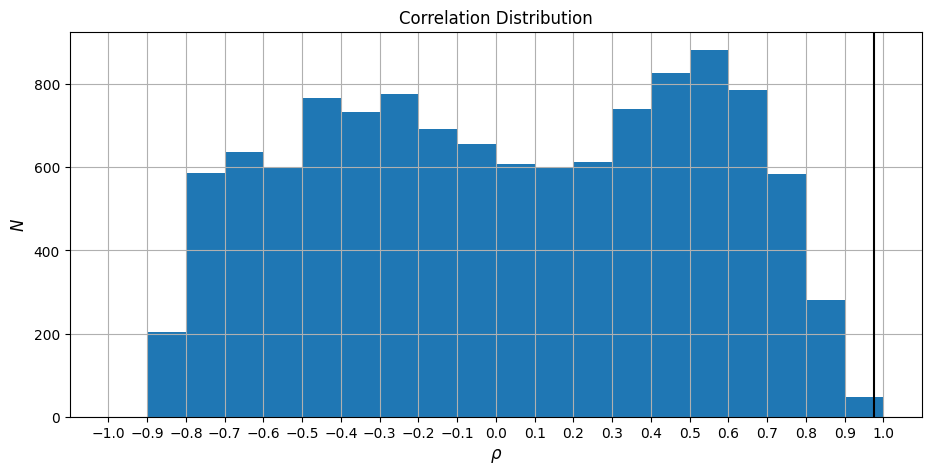

In [5]:
plt.figure(figsize=(11, 5))
bins = np.linspace(-1, 1, 21)
x, y, z = plt.hist(coefs, bins=bins)
plt.title("Correlation Distribution", fontsize=12)
plt.ylabel("$N$", fontsize=12)
plt.xlabel("$\\rho$", fontsize=12)
plt.xticks(bins)
plt.grid()
plt.axvline(COEF, color="k")
plt.show()

In [6]:
print(f"Relative frequency: {100 * x[-1] / len(coefs):.2f}%")

Relative frequency: 0.41%


Since 2011 - Roughly Total LPLA History - Reproduced for Readability

In [7]:
start = "2011-01-01"
end = None

symbols = [
    "BA",
    "INTC",
    "LPLA",
    "MU"
]

S_N = yf.download(symbols, start=start, end=end)["Close"]

idx = "^GSPC"
IDX = yf.download(idx, start=start, end=end)["Close"]
IDX_N = IDX / IDX.iloc[0]

spread_months = np.linspace(5, 10, 101)
spread_days = spread_months * 250 / 12
spread_days = spread_days.astype(int)

window = 40

coefs = []
dates = []

for i in range(IDX_N.shape[0] - spread_days[-1] - window):
  x = (S_N.iloc[i: i + window] / S_N.iloc[i]).mean(axis=1)
  for spread in spread_days:
    y = IDX_N["^GSPC"].iloc[i + spread: i + spread + window] / IDX_N["^GSPC"].iloc[i + spread]
    coef = np.cov(x, y) / (np.std(x) * np.std(y))
    coef = float(coef[1][0])
    coefs.append(coef)

coefs = np.array(coefs)

mean_, std_ = float(np.mean(coefs)), float(np.std(coefs))

print(f"Mean: {mean_:.3f}\nStandard deviation: {std_:.3f}")

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


Mean: 0.108
Standard deviation: 0.519


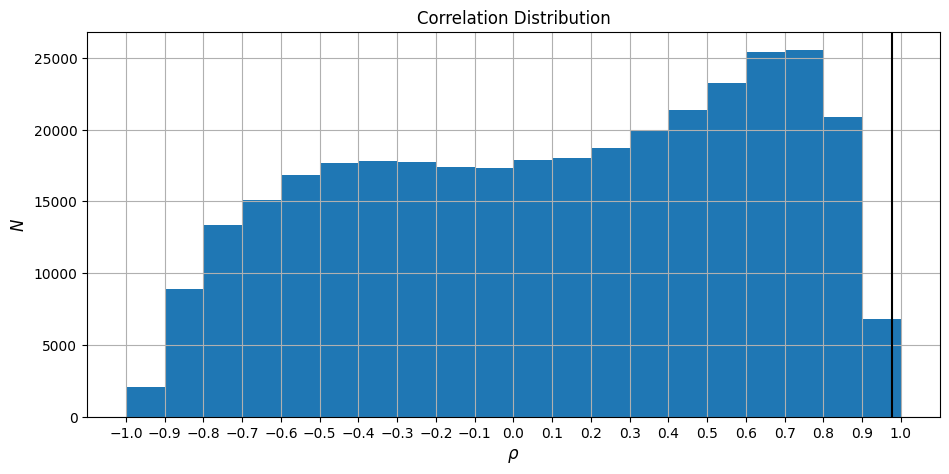

In [8]:
plt.figure(figsize=(11, 5))
bins = np.linspace(-1, 1, 21)
x, y, z = plt.hist(coefs, bins=bins)
plt.title("Correlation Distribution", fontsize=12)
plt.ylabel("$N$", fontsize=12)
plt.xlabel("$\\rho$", fontsize=12)
plt.xticks(bins)
plt.grid()
plt.axvline(COEF, color="k")
plt.show()

In [9]:
print(f"Relative frequency: {100 * x[-1] / len(coefs):.2f}%")

Relative frequency: 1.98%
